In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mlflow.models import infer_signature

from Models.sklearn_model import SklearnModel
from preprocessing.preprocessing import PreProcessing
from utils.mlflow_utils import log_confusion_matrix


In [2]:
df = pd.read_csv(r"C:\Learn_AI\Model\Titanic_2\DataSet\titanic.csv")
df.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

In [4]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']]

In [5]:
df['Age'].fillna(df['Age'].median() , inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0] , inplace =True)

In [6]:
df['Family_total'] = df['SibSp'] + df['Parch'] + 1
df.drop(['SibSp' , 'Parch' , 'Cabin'] , axis = 1 , inplace = True)

In [7]:
df.head(3)

Survived  Pclass     Sex   Age     Fare Embarked  Family_total
0         0       3    male  22.0   7.2500        S             2
1         1       1  female  38.0  71.2833        C             2
2         1       3  female  26.0   7.9250        S             1

In [8]:
df.describe()

Survived      Pclass         Age        Fare  Family_total
count  156.000000  156.000000  156.000000  156.000000    156.000000
mean     0.346154    2.423077   27.729679   28.109587      2.012821
std      0.477275    0.795459   13.150938   39.401047      1.614400
min      0.000000    1.000000    0.830000    6.750000      1.000000
25%      0.000000    2.000000   21.000000    8.003150      1.000000
50%      0.000000    3.000000   26.000000   14.454200      1.000000
75%      1.000000    3.000000   33.000000   30.371850      2.000000
max      1.000000    3.000000   71.000000  263.000000      8.000000

<Axes: xlabel='Survived', ylabel='Age'>

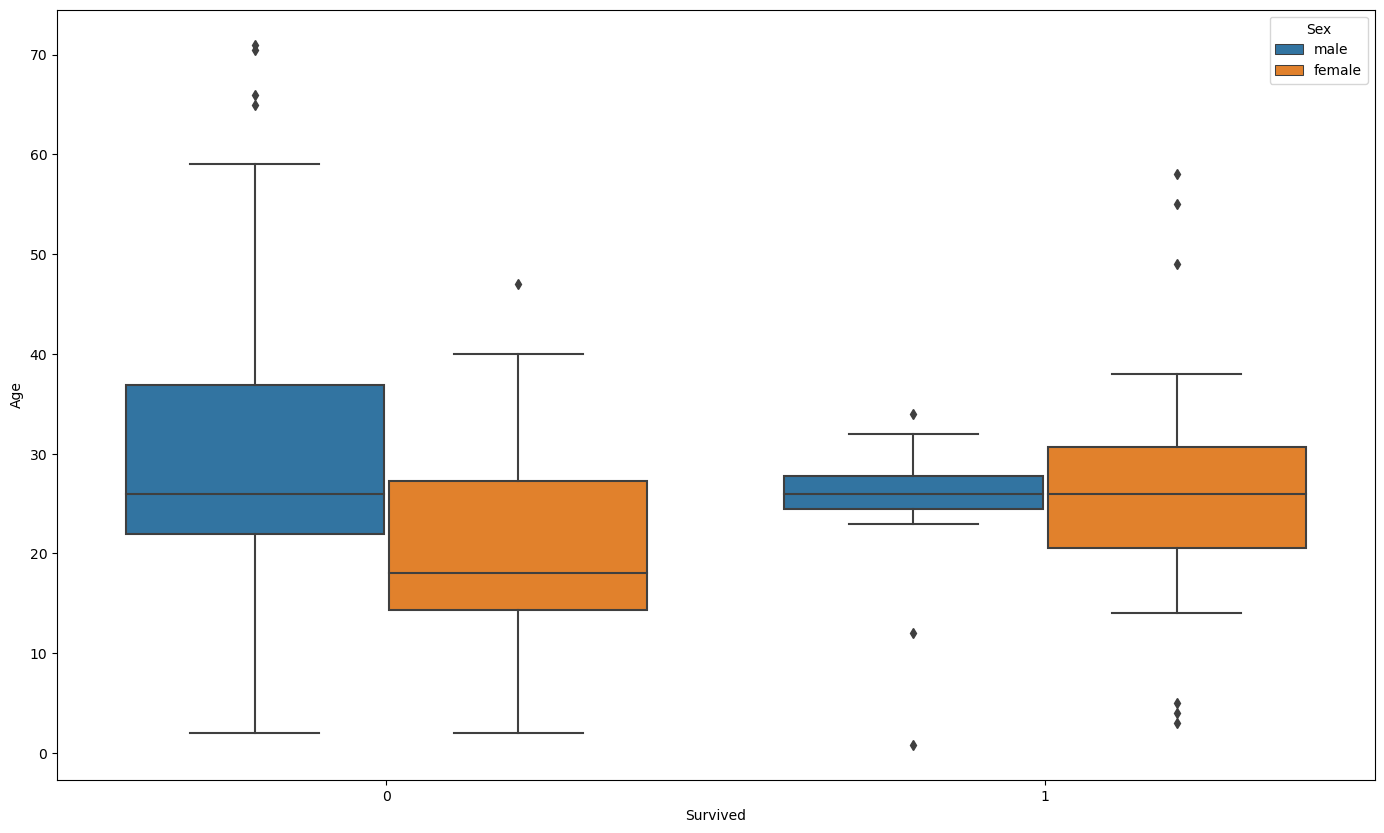

In [9]:
plt.figure(figsize = (17,10))
sns.boxplot(y = df['Age'] , x = df['Survived'] , hue = df['Sex'])


- N·ªØ s·ªëng s√≥t nhi·ªÅu h∆°n nam:

- C·ªôt Survived = 1: H·ªôp m√†u cam (n·ªØ) cao h∆°n nhi·ªÅu.

- Nam s·ªëng s√≥t c√≥ tu·ªïi t·∫≠p trung h·∫πp (~25-30), n·ªØ s·ªëng s√≥t tu·ªïi tr·∫£i d√†i h∆°n.

- Nam gi·ªõi t·ª≠ vong nhi·ªÅu h∆°n:

- C·ªôt Survived = 0: H·ªôp xanh (nam) l·ªõn v√† nhi·ªÅu outlier.

- Nhi·ªÅu nam t·ª≠ vong ·ªü ƒë·ªô tu·ªïi 20-40.

- Tr·∫ª em v√† ph·ª• n·ªØ d·ªÖ s·ªëng s√≥t h∆°n:

- N·ªØ s·ªëng s√≥t nhi·ªÅu ·ªü m·ªçi ƒë·ªô tu·ªïi (th·ªÉ hi·ªán b·∫±ng h·ªôp m√†u cam b√™n Survived = 1).

- Nam ch·ªâ s·ªëng s√≥t t·∫≠p trung v√†o 1 nh√≥m nh·ªè tu·ªïi (h·∫πp).

- Ph·ª• n·ªØ c√≥ t·ªâ l·ªá s·ªëng s√≥t cao h∆°n nam (ƒë√∫ng v·ªõi ch√≠nh s√°ch Titanic: "Ladies and children first").

 - Nam gi·ªõi, d√π ·ªü ƒë·ªô tu·ªïi n√†o c≈©ng d·ªÖ t·ª≠ vong h∆°n.

 - Tu·ªïi c√≥ ·∫£nh h∆∞·ªüng nh·∫π ƒë·∫øn t·ªâ l·ªá s·ªëng s√≥t, nh∆∞ng y·∫øu t·ªë gi·ªõi t√≠nh r√µ r·ªát h∆°n.

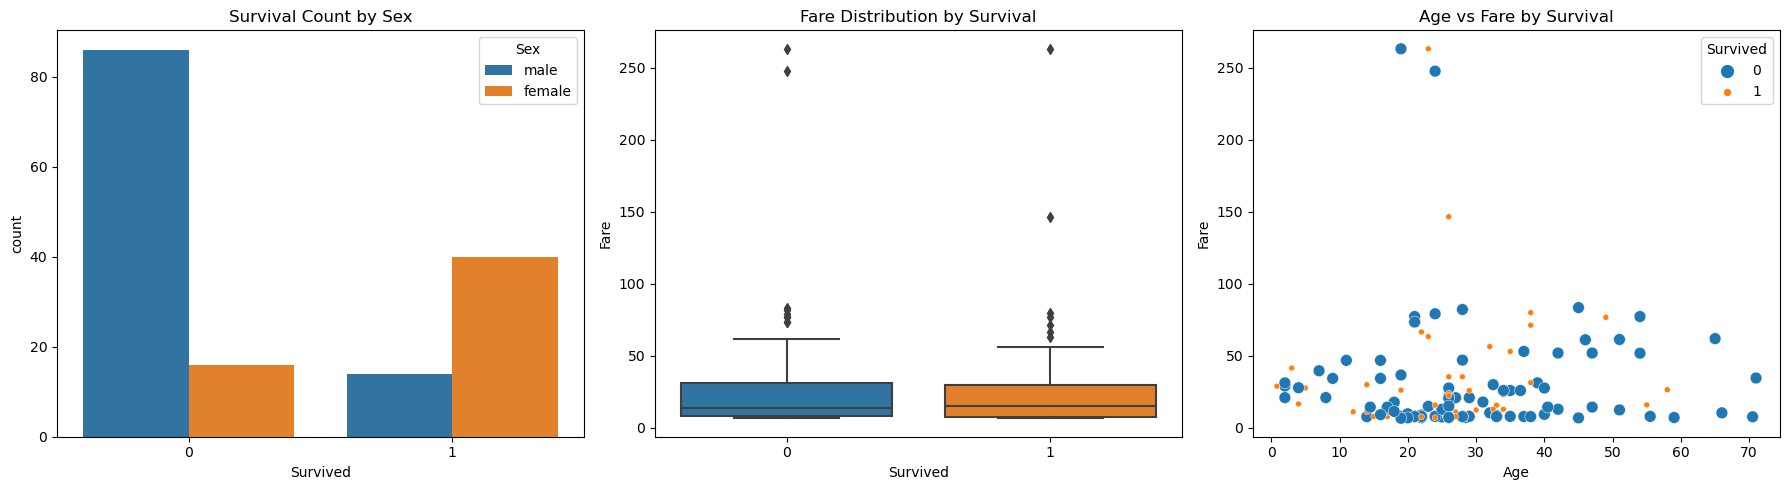

In [10]:
# Thi·∫øt l·∫≠p b·ªë c·ª•c cho 3 bi·ªÉu ƒë·ªì
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='Survived', hue='Sex', data=df, ax=axes[0])
axes[0].set_title('Survival Count by Sex')

sns.boxplot(x='Survived', y='Fare', data=df, ax=axes[1])
axes[1].set_title('Fare Distribution by Survival')

sns.scatterplot(x='Age', y='Fare', hue='Survived', size='Survived', data=df, ax=axes[2])
axes[2].set_title('Age vs Fare by Survival')

plt.tight_layout()
plt.show()

- Gi√° v√© kh√¥ng c√≥ s·ª± kh√°c bi·ªát qu√° l·ªõn gi·ªØa hai nh√≥m, nh∆∞ng ng∆∞·ªùi s·ªëng s√≥t c√≥ xu h∆∞·ªõng tr·∫£ gi√° v√© cao h∆°n m·ªôt ch√∫t. ƒêi·ªÅu n√†y c√≥ th·ªÉ li√™n quan ƒë·∫øn vi·ªác nh·ªØng ng∆∞·ªùi tr·∫£ gi√° v√© cao h∆°n thu·ªôc l·ªõp v√© cao h∆°n (Pclass th·∫•p h∆°n), v·ªën c√≥ kh·∫£ nƒÉng s·ªëng s√≥t cao h∆°n. Tuy nhi√™n, ·∫£nh h∆∞·ªüng c·ªßa gi√° v√© kh√¥ng qu√° r√µ r√†ng.

In [11]:
df.head(2)

Survived  Pclass     Sex   Age     Fare Embarked  Family_total
0         0       3    male  22.0   7.2500        S             2
1         1       1  female  38.0  71.2833        C             2

In [12]:
X = df.drop('Survived' , axis =1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
standard_cols =['Age' , 'Fare']
categorical_cols = ['Sex', 'Embarked']
prep = PreProcessing(sds_cols=standard_cols, ohe_cols=categorical_cols)
param_grid = {'model__C': [0.1, 1.0, 10.0]}
model = SklearnModel(
    model=LogisticRegression(max_iter=1000),
    preprocessing=prep,
    param_grid=param_grid
)
labels = ['Died', 'Survived']

# 3. Thi·∫øt l·∫≠p MLflow
mlflow.set_tracking_uri(uri="http://localhost:5000") 
mlflow.set_experiment("Titanic Experiment")

# 4. Hu·∫•n luy·ªán v√† log
with mlflow.start_run(run_name="Logistic Regression"):
    model.fit(X_train, y_train)
    result = model.evaluate(X_test, y_test)

    # Log params
    if hasattr(model.pipeline, "best_params_"):
        mlflow.log_params(model.pipeline.best_params_)
    else:
        mlflow.log_params(model.model.get_params())

    # Log metrics
    mlflow.log_metric("accuracy", result["accuracy"])
    with open("classification_report.txt", "w") as f:
        f.write(str(result["classification_report"]))
    mlflow.log_artifact("classification_report.txt")

    # Log confusion matrix ·∫£nh
    cm_path = log_confusion_matrix(result["confusion_matrix"], labels)
    mlflow.log_artifact(cm_path)

    # Log model
    signature = infer_signature(X_train, model.pipeline.predict(X_train))
    mlflow.sklearn.log_model(
        sk_model=model.pipeline,
        artifact_path="model",
        signature=signature,
        input_example=X_train[:5],
        registered_model_name="Titanic-LogisticRegression"
    )

2025/05/19 09:55:28 INFO mlflow.tracking.fluent: Experiment with name 'Titanic Experiment' does not exist. Creating a new experiment.


Successfully registered model 'Titanic-LogisticRegression'.
2025/05/19 09:55:37 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Titanic-LogisticRegression, version 1


üèÉ View run Logistic Regression at: http://localhost:5000/#/experiments/139198463418536674/runs/b43aa189a67742e885efd14f640b1f37
üß™ View experiment at: http://localhost:5000/#/experiments/139198463418536674


Created version '1' of model 'Titanic-LogisticRegression'.


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# C√°c m√¥ h√¨nh v√† grid t∆∞∆°ng ·ª©ng
models_with_params = {
    "LogisticRegression": (
        LogisticRegression(max_iter=1000),
        {'model__C': [0.1, 1.0, 10.0]}
    ),
    "RandomForest": (
        RandomForestClassifier(),
        {'model__n_estimators': [100, 200], 'model__max_depth': [5, 10]}
    ),
    "SVM": (
        SVC(probability=True),
        {'model__C': [0.1, 1.0], 'model__kernel': ['linear', 'rbf']}
    )
}

# ƒê·ªãnh nghƒ©a c√°c c·ªôt ti·ªÅn x·ª≠ l√Ω
standard_cols = ['Age', 'Fare']
categorical_cols = ['Sex', 'Embarked']
labels = ['Died', 'Survived']

# MLflow config
mlflow.set_tracking_uri(uri="http://localhost:5000") 
mlflow.set_experiment("Titanic Experiment")

# Train t·ª´ng m√¥ h√¨nh
for model_name, (clf, param_grid) in models_with_params.items():
    print(f"\n--- Training: {model_name} ---")

    prep = PreProcessing(sds_cols=standard_cols, ohe_cols=categorical_cols)
    model = SklearnModel(model=clf, preprocessing=prep, param_grid=param_grid)

    with mlflow.start_run(run_name=model_name):
        model.fit(X_train, y_train)
        result = model.evaluate(X_test, y_test)

        # Log parameters
        if hasattr(model.pipeline, "best_params_"):
            mlflow.log_params(model.pipeline.best_params_)
        else:
            mlflow.log_params(model.model.get_params())

        # Log metrics
        mlflow.log_metric("accuracy", result["accuracy"])

        # Log classification report
        with open("classification_report.txt", "w") as f:
            f.write(str(result["classification_report"]))
        mlflow.log_artifact("classification_report.txt")

        # Log confusion matrix
        cm_path = log_confusion_matrix(result["confusion_matrix"], labels)
        mlflow.log_artifact(cm_path)

        # Log model
        signature = infer_signature(X_train, model.pipeline.predict(X_train))
        mlflow.sklearn.log_model(
            sk_model=model.pipeline,
            artifact_path="model",
            signature=signature,
            input_example=X_train[:5],
            registered_model_name=f"Titanic-{model_name}"
        )



--- Training: LogisticRegression ---


Registered model 'Titanic-LogisticRegression' already exists. Creating a new version of this model...
2025/05/19 09:59:07 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Titanic-LogisticRegression, version 2
Created version '2' of model 'Titanic-LogisticRegression'.


üèÉ View run LogisticRegression at: http://localhost:5000/#/experiments/139198463418536674/runs/208ea21e3a214580bb6cf5168e5bdb11
üß™ View experiment at: http://localhost:5000/#/experiments/139198463418536674

--- Training: RandomForest ---


Successfully registered model 'Titanic-RandomForest'.
2025/05/19 09:59:14 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Titanic-RandomForest, version 1
Created version '1' of model 'Titanic-RandomForest'.


üèÉ View run RandomForest at: http://localhost:5000/#/experiments/139198463418536674/runs/554e0818f6d247a08e0d0f7d84ba6fc9
üß™ View experiment at: http://localhost:5000/#/experiments/139198463418536674

--- Training: SVM ---


Successfully registered model 'Titanic-SVM'.
2025/05/19 09:59:18 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Titanic-SVM, version 1


üèÉ View run SVM at: http://localhost:5000/#/experiments/139198463418536674/runs/29425553097b404aad56bf021fcfa908
üß™ View experiment at: http://localhost:5000/#/experiments/139198463418536674


Created version '1' of model 'Titanic-SVM'.
